In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit

In [8]:
pk = Psikit(debug=True,threads=1,memory=12)

In [9]:
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

In [10]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571175888341

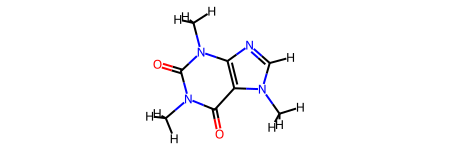

In [11]:
pk.mol

In [12]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.26338623  0.03737558  0.14125808 -0.50333577  0.19904435 -0.10630109
  0.37056707 -0.49611153 -0.06889938  0.40594498 -0.53247521 -0.03370192
 -0.02684198 -0.03926732  0.12907727  0.12907727  0.12907727  0.15767581
  0.06031329  0.06031329  0.06031329  0.06342763  0.06342763  0.06342763]
[-0.11403967 -0.69387156  0.38640992 -0.62283945  0.63497336  0.09325916
  0.89978884 -0.63014389 -0.87904359  1.09566891 -0.62724404 -0.87749667
 -0.1204086  -0.12349385  0.16727776  0.12973205  0.16726874  0.18241272
  0.14895391  0.16750551  0.14892483  0.17519494  0.1456015   0.14560915]
[-0.13380271 -0.05299239  0.07341591 -0.27556718  0.14068509 -0.12562044
  0.3015884  -0.39776468 -0.19015029  0.34353428 -0.39679981 -0.15093681
 -0.13478088 -0.14042327  0.11799231  0.10695344  0.11541974  0.12511248
  0.1071822   0.1198165   0.10903924  0.12463684  0.10549272  0.10796929]


In [13]:
mol = pk.mol
atoms = mol.GetAtoms()

In [14]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [15]:
df = pd.DataFrame(data)

In [16]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.263,-0.114,-0.134
1,N,0.037,-0.694,-0.053
2,C,0.141,0.386,0.073
3,N,-0.503,-0.623,-0.276
4,C,0.199,0.635,0.141
5,C,-0.106,0.093,-0.126
6,C,0.371,0.900,0.302
7,O,-0.496,-0.630,-0.398
8,N,-0.069,-0.879,-0.190
9,C,0.406,1.096,0.344


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
plt.style.use('ggplot')

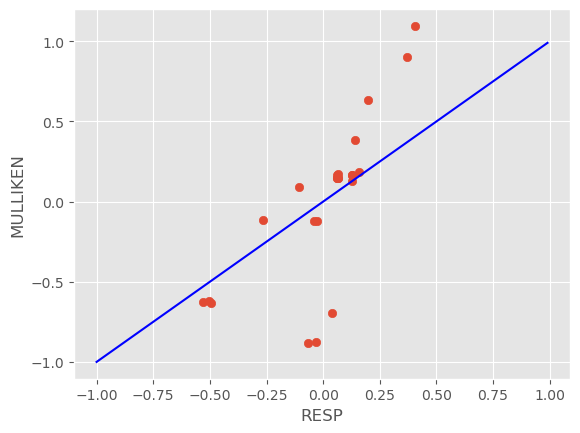

In [19]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

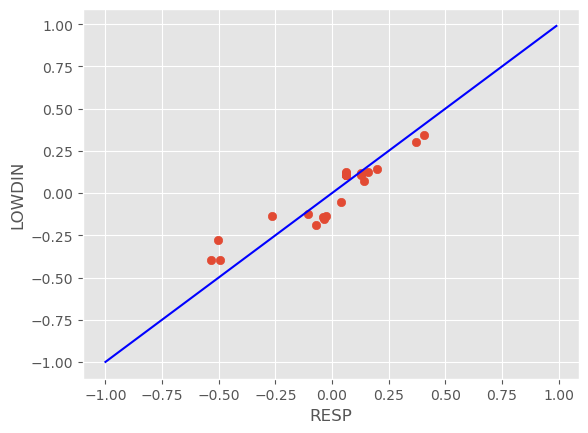

In [20]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

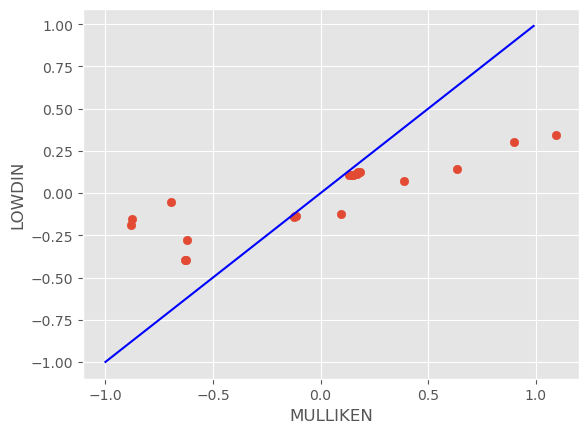

In [21]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')